Other dunder methods
1) __call__
2) __str__, __repr__, __len__, __abs__
3) __add__, __sub__, __mul__, __truediv__
4) __eq__, __ne__, __lt__, __gt__ and others
5) __eq__ and __hash__
6) __bool__
7) __getitem__, __setitem__ and __delitem__
8) __iter__ and __next__

# 1) __call__

На этом занятии мы познакомимся с очередным магическим методом __call__. Магические методы еще называют:

dunder-методы (от англ. сокращения double underscore)

Итак, когда вызывается метод __call__ и для чего он нужен? 

Как вы уже знаете, после объявления любого класса:

In [1]:
# Давайте создадим класс счетчик и пропишем инициализатор
class Counter:
    def __init__(self):
        self.__counter = 0 #В экземпллярах класса будем создавать приватное свойство

In [4]:
# Создаем экземпляр объекта нашего класса:
c = Counter()

Обратите внимание на круглые скобки после имени класса. В общем случае – это оператор вызова, например, так можно вызывать функции. Но, как видите, так можно вызывать и классы. **В действительности, когда происходит вызов класса, то автоматически вызывается магический метод** __call__ и в данном случае он создает новый экземпляр этого класса:

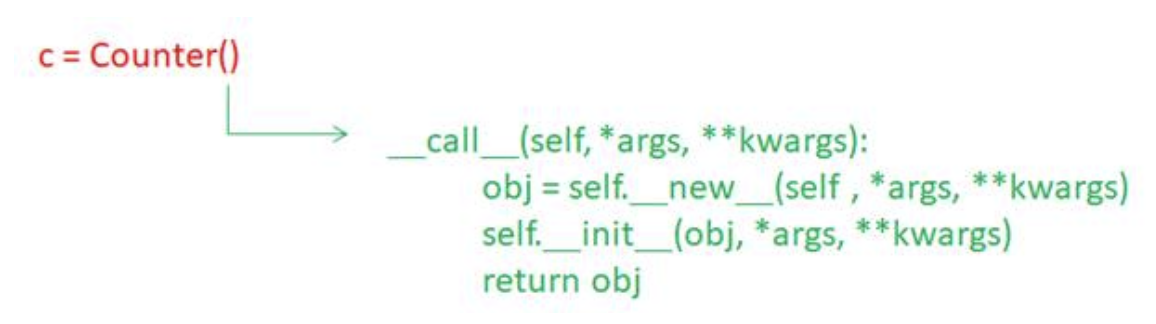

Это очень упрощенная схема реализации метода __call__, в действительности, она несколько сложнее, но принцип тот же: сначала вызывается магический метод __new__ для создания самого объекта в памяти устройства, а затем, метод __init__ - для его инициализации. То есть, класс можно вызывать подобно функции благодаря встроенной для него реализации магического метода __call__. А вот экземпляры классов так вызывать уже нельзя. Если записать команду:

In [5]:
c()

TypeError: 'Counter' object is not callable

то возникнет ошибка: «TypeError: 'Counter' object is not callable».
Т.е. экземпляры класса, подобно функциям мы не можем. Они "невызываемые", т.к. у нас не определен магический метод call.

Как вы уже догадались, мы можем поправить этот момент, если явно в классе Counter пропишем магический метод __call__, например, так:

In [6]:
class Counter:
    def __init__(self):
        self.__counter = 0
 
    def __call__(self, *args, **kwargs):
        print("__call__")
        self.__counter += 1
        return self.__counter

Здесь мы выводим сообщение, что был вызван данный метод, затем увеличиваем счетчик counter для текущего объекта на 1 и возвращаем его.


Запустим программу снова и теперь никаких ошибок нет, а в консоли отобразилась строка «__call__», что означает вызов магического метода __call__. То есть, благодаря добавлению этого магического метода в наш класс, теперь можно вызывать его экземпляры подобно функциям через оператор круглые скобки. Классы, экземпляры которых можно вызывать подобно функциям, получили название функторы.

В нашем случае метод __call__ возвращает значение счетчика, поэтому с объектом можно работать, следующим образом:

In [7]:
c = Counter()
c()
c()
res = c()
print(res)

__call__
__call__
__call__
3


Мы здесь три раза вызвали метод __call__ и счетчик __counter трижды увеличился на единицу. Поэтому в консоли мы видим значение 3. Мало того, если создать еще один объект-счетчик, То они будут работать совершенно независимо и подсчитывать число собственных вызовов того или иного экземпляра класса.

In [8]:
c = Counter()
c2 = Counter()
c()
c()
res = c()
res2 = c2()
print(res, res2)

__call__
__call__
__call__
__call__
3 1


Давайте еще раз посмотрим на определение метода __call__. Здесь записаны параметры *args, **kwargs. Это значит, что при вызове объектов мы можем передавать им произвольное количество аргументов. Например, в нашем случае можно указать значение изменения счетчика при текущем вызове. Для этого я перепишу метод __call__, следующим образом:
```
def __call__(self, step=1, *args, **kwargs):
        self.__counter += step
        return self.__counter
```

In [9]:
class Counter:
    def __init__(self):
        self.__counter = 0
 
    def __call__(self, step=1, *args, **kwargs):
        self.__counter += step
        return self.__counter

Здесь появился в явном виде первый параметр step с начальным значением 1. То есть, можно вызывать объекты, например, так:

In [10]:
c(2)
c(10)
res = c()
res2 = c2(-5)

__call__
__call__
__call__
__call__


Вот общий принцип работы магического метода __call__.
Другие примеры использования, возможно, рассмотрим позже.

# 2) __str__, __repr__, __len__, __abs__

Они определены в кажлом классе.

Каждый магический метод автоматически срабатывает в определенный момент времени, например, следующие методы срабатывают в момент отображения информации об объекте класса:
* __str__() – магический метод для отображения информации об объекте класса для пользователей (например, для функций print, str);
* __repr__() – магический метод для отображения информации об объекте класса в режиме отладки (для разработчиков).


Чтобы лучше понять, как работают эти методы, объявим класс для описания кошек:

In [1]:
class Cat:
    def __init__(self, name):
        self.name = name

Перейдем в консоль Python, скопируем (определим) этот класс. Затем, создадим его экземпляр:

In [3]:
cat = Cat('Васька')
cat

При выводе cat, увидим служебную информацию:

<ex1.Cat object at 0x0495D028>

Если нам нужно ее как-то переопределить и отобразить в другом виде (формате), то, как раз для этого используются магические методы __str__ и __repr__. Давайте для начала переопределим метод __repr__ и посмотрим, как это отразится на выводе служебной информации об экземпляре класса. Для этого, пропишем в классе наш магический метод:
```
def __repr__(self):
        return f"{self.__class__}: {self.name}"
```

In [145]:
class Cat:
    def __init__(self, name):
        self.name = name
        
    def __repr__(self):
        return f"{self.__class__}: {self.name}" # -> string

В начале в return выводим имя класса, через свойство __ class __, которое хранит имя класса. И через двоеточие выведем имя кошки.

https://docs.python.org/3/library/stdtypes.html?highlight=__dict__#special-attributes

In [146]:
cat = Cat('Васька')
cat

<class '__main__.Cat'>: Васька

Обратите внимание, этот метод должен возвращать строку, поэтому здесь записан оператор return и формируемая строка. Что именно возвращать, мы решаем сами, в данном случае – это название класса и имя кошки.

Переопределим измененный класс Cat. И, смотрите, теперь при создании экземпляра мы видим другую информацию при его выводе:

<class 'ex1.Cat'>: Васька

Как раз то, что определили в магическом методе __repr__. 

То же самое увидим и при использовании функции print и str. 

In [148]:
print(cat) # Выведет информацию об эеземпляре класса Cat

<class '__main__.Cat'>: Васька


In [149]:
str(cat)

"<class '__main__.Cat'>: Васька"

По идее, когда мы пользуемся функциями print или str, то это это уже вывод не отладочной информации, а вывод данных для пользователя, а значит здесь должен отрабатывать магический метод __str__. Но так как он у нас еще не переопределен, то автоматически выполняется метод __repr__.
Т.е. предполагается, что, например, через print и str  выводим не служебную информацию, а информацию для пользователя.
А когда в консоли пишем cat, то предполагается вывод служебной информации при отладке.


Давайте добавим второй магический метод __str__ и посмотрим, как это повлияет на отображение данных:
```
def __str__(self):
        return f"{self.name}"
```

In [7]:
class Cat:
    def __init__(self, name):
        self.name = name
        
    def __repr__(self):
        return f"{self.__class__}: {self.name}"
    
    def __str__(self):
        return f"{self.name}" # -> string

In [8]:
cat = Cat('Васька')
cat # Отработает метод repr

<class '__main__.Cat'>: Васька

In [9]:
print(cat) # Отработает метод str

Васька


In [ ]:
str(cat)
# 'Васька'

Следующие два магических метода:

* __len__() – позволяет применять функцию len() к экземплярам класса;
* __abs__() - позволяет применять функцию abs() к экземплярам класса.

Их использование достаточно простое и очевидное. Давайте для примера представим, что у нас есть класс Point, который может хранить произвольный вектор координат точек, и определим его так:

In [ ]:
class Point:
    def __init__(self, *args): # Инициализатор
        self.__coords = args # Список из координат точек. Точка - на плоскости. Две точки - точка в 2д пространстве. Три - в 3д и т.д.

А, далее, по программе нам бы хотелось определять размерность координат с помощью функции len(), следующим образом:

In [10]:
p = Point(1, 2)
print(len(p))

NameError: name 'Point' is not defined

Если сейчас запустить программу, то увидим ошибку, так как функция len не применима к экземплярам классов по умолчанию. Как вы уже догадались, чтобы изменить это поведение, можно переопределить магический метод __len__(). Предположим, что мы хотим, чтобы функция len возвращала кол-во координат нашей точки и в нашем случае это можно сделать так:
```
def __len__(self):
        return len(self.__coords)
```

In [11]:
class Point:
    def __init__(self, *args):
        self.__coords = args

    def __len__(self):
        return len(self.__coords) # Вызывается len для списка __coords

Смотрите, мы здесь возвращаем размер списка __coords и если после этого запустить программу, то как раз это значение и будет выведено в консоль. То есть, магический метод __len__ указал, что нужно возвращать, в момент применения функции len() к экземпляру класса. Как видите, все просто и очевидно.

In [12]:
p = Point(1, 2)
print(len(p)) # Когда вызывается функция len, то автоматически вызывается магический метод len и возвращается размер __coords

2


object.__len__(self)
    Called to implement the built-in function len().  # Вызывается для реализации встроенной функции len().

len(obj, /)
    Return the number of items in a container.

Следующий магический метод __abs__ работает аналогичным образом, только активируется в момент вызова функции abs для экземпляра класса, например, так:

In [13]:
print(abs(p))

TypeError: bad operand type for abs(): 'Point'

Опять же, если сейчас выполнить программу, то увидим ошибку, т.к. функция abs не может быть напрямую применена к экземпляру. Но, если переопределить магический метод, для вычисления модуля каждой из координат:
```
def __abs__(self):
        return list(map(abs, self.__coords))
```

In [19]:
class Point:
    def __init__(self, *args):
        self.__coords = args

    def __len__(self):
        return len(self.__coords)
    
    def __abs__(self):
        return list(map(abs, self.__coords)) 

который возвращает список из абсолютных значений координат точки, то программа отработает в штатном режиме и мы увидим ожидаемый результат.

In [20]:
p = Point(1, -2)
print(abs(p))

[1, 2]


Вот так можно использовать эти два магических метода. 

# 3) __add__, __sub__, __mul__, __truediv__

Рассмотрим методы для работы с арифметическими операторами:

* __add__() – для реализации операции сложения;
* __sub__() – для реализации операции вычитания;
* __mul__() – для реализации операции умножения;
* __truediv__() – для реализации операции деления.

Как всегда, объяснить работу этих методов проще всего на конкретном примере. Предположим, что мы создаем класс для работы со временем. Его экземпляры будут хранить часы, минуты и секунды текущего дня. Начальной точкой отсчета будет 00:00 часов ночи. Время будем хранить в виде секунд с максимальным значением 86400 – число секунд в одном дне. Поэтому перед присвоением в инициализаторе будем брать остаток от деления на это значение:

In [ ]:
# Отсчет от 12 ночи
class Clock:
    __DAY = 86400   # число секунд в одном дне
 
    def __init__(self, seconds: int):
        if not isinstance(seconds, int): # секунды целые числа?
            raise TypeError("Секунды должны быть целым числом")
        self.seconds = seconds % self.__DAY # сохраняем секунды в экземпляре класса. остаток от деления, чтобы секунды не превысили число секунд в 1 дне

Обратите внимание как записан параметр seconds. После него стоит двоеточие и указан ожидаемый тип данных. Эта нотация языка Python подсказывает программисту, какой тип данных следует передавать в качестве seconds. Конечно, мы можем передавать и другие типы данных, строгого ограничения здесь нет, это лишь пометка для программиста и не более того. Поэтому далее внутри инициализатора мы делаем проверку, что параметр seconds должен являться целым числом. Если это не так, генерируем исключение TypeError.

Далее в этом же классе пропишем метод get_time для получения текущего времени в виде форматной строки:

In [21]:
class Clock:
    __DAY = 86400   # число секунд в одном дне
 
    def __init__(self, seconds: int):
        if not isinstance(seconds, int):
            raise TypeError("Секунды должны быть целым числом")
        self.seconds = seconds % self.__DAY

    def get_time(self):
        s = self.seconds % 60            # секунды
        m = (self.seconds // 60) % 60    # минуты
        h = (self.seconds // 3600) % 24  # часы
        return f"{self.__get_formatted(h)}:{self.__get_formatted(m)}:{self.__get_formatted(s)}" # Будем вызывать метод , для отображения в виде 00:00:00. т.е. если число однозначное, то добавляем 0 слева. 9 -> 09
 
    @classmethod
    def __get_formatted(cls, x: int):
        return str(x).rjust(2, "0") # функция возвращает строку выравненную по правому краю в строке по ширине. Заполнение выполняется с использованием указанного FillChar (по умолчанию пробел).

Здесь дополнительно определен метод класса для форматирования времени (добавляется незначащий первый ноль, если число меньше 10).

Далее, мы можем воспользоваться этим классом, например, так:

In [22]:
c1 = Clock(1000) # эеземпляр класса Clock. Передаем количество секунд
print(c1.get_time()) # Выводим отформатированное время, через наш метод

00:16:40


Если же нам понадобиться изменить время в объекте c1, то сейчас это можно сделать через локальное свойство seconds:

In [24]:
c1.seconds = c1.seconds + 100
c1.__dict__

{'seconds': 1200}

Мы добавили 100 секунд. Но было бы здорово если бы это изменение можно было бы прописать вот так:

In [25]:
c1 = c1 + 100

TypeError: unsupported operand type(s) for +: 'Clock' and 'int'

Конечно, при запуске программы возникнет ошибка, так как оператор сложения не работает с экземплярами класса Clock. Однако, это можно поправить, если добавить в наш класс магический метод __add__. Я запишу его в следующем виде:
```
def __add__(self, other):
        if not isinstance(other, int):
            raise ArithmeticError("Правый операнд должен быть типом int")
 
        return Clock(self.seconds + other)
```

In [35]:
class Clock:
    __DAY = 86400   # число секунд в одном дне
 
    def __init__(self, seconds: int):
        if not isinstance(seconds, int):
            raise TypeError("Секунды должны быть целым числом")
        self.seconds = seconds % self.__DAY

    def get_time(self):
        s = self.seconds % 60            # секунды
        m = (self.seconds // 60) % 60    # минуты
        h = (self.seconds // 3600) % 24  # часы
        return f"{self.__get_formatted(h)}:{self.__get_formatted(m)}:{self.__get_formatted(s)}"
 
    @classmethod
    def __get_formatted(cls, x):
        return str(x).rjust(2, "0")
    
    def __add__(self, other):
        if not isinstance(other, int):
            raise ArithmeticError("Правый операнд должен быть типом int")
 
        return Clock(self.seconds + other)

И теперь, при запуске программы, все работает так, как и задумывалось. Давайте разберем этот момент подробнее.

Вначале у нас есть объект класса Clock со значением секунд 1000. Затем, арифметическая операция c1 = c1 + 100 фактически означает выполнение команды с1 = c1.__add__(100) :

In [37]:
c1 = Clock(1000)
c1 = c1 + 100
print(c1.__dict__)
#c1 = c1.__add__(100)
#c1.__dict__

{'seconds': 1100}


В результате, активируется метод __add__ и параметр other принимает целочисленное значение 100. Проверка проходит и формируется новый объект класса Clock со значением секунд 1000+100 = 1100. Этот объект возвращается методом __add__ и переменная c1 начинает ссылаться на этот новый экземпляр класса. На прежний уже не будет никаких внешних ссылок, поэтому он будет автоматически удален сборщиком мусора.

Вас может удивить сложность процессов, когда нам всего лишь нужно прибавить 100 секунд к уже имеющемуся значению. Но эта сложность оправданна. Чтобы это понять, мы расширим функционал оператора сложения и допустим, что можно складывать два разных объекта класса Clock, следующим образом:

In [38]:
c1 = Clock(1000)
c2 = Clock(2000)
c3 = c1 + c2
print(c3.get_time())

ArithmeticError: Правый операнд должен быть типом int

Конечно, если сейчас запустить программу, то увидим ошибку ArithmeticError, так как параметр other не соответствует целому числу. Поправим это и немного изменим реализацию метода __add__:
```
def __add__(self, other):
        if not isinstance(other, (int, Clock)):
            raise ArithmeticError("Правый операнд должен быть типом int или объектом Clock")
 
        sc = other if isinstance(other, int) else other.seconds
        return Clock(self.seconds + sc)
```

In [39]:
class Clock:
    __DAY = 86400   # число секунд в одном дне
 
    def __init__(self, seconds: int):
        if not isinstance(seconds, int):
            raise TypeError("Секунды должны быть целым числом")
        self.seconds = seconds % self.__DAY

    def get_time(self):
        s = self.seconds % 60            # секунды
        m = (self.seconds // 60) % 60    # минуты
        h = (self.seconds // 3600) % 24  # часы
        return f"{self.__get_formatted(h)}:{self.__get_formatted(m)}:{self.__get_formatted(s)}"
 
    @classmethod
    def __get_formatted(cls, x):
        return str(x).rjust(2, "0")
    
    def __add__(self, other):
        if not isinstance(other, (int, Clock)):
            raise ArithmeticError("Правый операнд должен быть типом int или объектом Clock")
 
        sc = other if isinstance(other, int) else other.seconds
        return Clock(self.seconds + sc)

In [42]:
c1 = Clock(1000)
c2 = Clock(2000)
c3 = c1 + c2
print(c3.get_time())

00:50:00


Теперь, в программе можно складывать и отдельные целые числа и объекты классов Clock. Видите, как это удобно! Кроме того, мы можем прописывать и более сложные конструкции при сложении, например, такие:

In [43]:
c1 = Clock(1000)
c2 = Clock(2000)
c3 = Clock(3000)
c4 = c1 + c2 + c3
print(c4.get_time())

01:40:00


И она сработала благодаря тому, что метод __add__ возвращает каждый раз новый экземпляр класса Clock. Детальнее все выглядит так.

Сначала идет сложение объектов c1 + c2, в результате формируется новый объект класса Clock со значением секунд 1000 + 2000 = 3000. Пусть на этот класс ведет внутренняя переменная t1. Затем, для этого нового объекта вызывается снова метод __add__ и идет сложение с объектом t1 + c3. Получаем еще один объект с числом секунд 6000. На этот объект, как раз и будет ссылаться переменная c4, а объект с t1 будет автоматически уничтожен сборщиком мусора.

Если бы мы не создавали экземпляры классов Clock в методе __add__ и не возвращали их, то конструкцию с двумя сложениями было бы невозможно реализовать.

Еще одним важным нюансом работы оператора сложения для объектов классов, является порядок их записи. Мы всегда прописывали его в виде:

In [44]:
c1 = c1 + 100

In [45]:
c1 = 100 + c1

TypeError: unsupported operand type(s) for +: 'int' and 'Clock'

и это очевидно, так как здесь, фактически идет вызов метода:

100.__add__(c1)

но он не существует для объекта int и экземпляров класса Clock. Как выйти из этой ситуации? Очень просто. Язык Python предоставляет нам специальный набор магических методов с добавлением буквы r:

__radd__()

Он автоматически вызывается, если не может быть вызван метод __add__(). Давайте добавим его определение в наш класс Clock:
```
def __radd__(self, other):
        return self + other
```

In [46]:
class Clock:
    __DAY = 86400   # число секунд в одном дне
 
    def __init__(self, seconds: int):
        if not isinstance(seconds, int):
            raise TypeError("Секунды должны быть целым числом")
        self.seconds = seconds % self.__DAY

    def get_time(self):
        s = self.seconds % 60            # секунды
        m = (self.seconds // 60) % 60    # минуты
        h = (self.seconds // 3600) % 24  # часы
        return f"{self.__get_formatted(h)}:{self.__get_formatted(m)}:{self.__get_formatted(s)}"
 
    @classmethod
    def __get_formatted(cls, x):
        return str(x).rjust(2, "0")
    
    def __add__(self, other):
        if not isinstance(other, (int, Clock)):
            raise ArithmeticError("Правый операнд должен быть типом int или объектом Clock")
 
        sc = other if isinstance(other, int) else other.seconds
        return Clock(self.seconds + sc)
    
    def __radd__(self, other):
        return self + other

Смотрите, мы здесь записали команду сложения текущего объекта класса Clock с параметром other, который может быть или числом или тоже объектом класса Clock. В свою очередь будет вызван метод __add__, но с правильным порядком типов данных, поэтому сложение пройдет без ошибок.

In [49]:
c1 = Clock(1000)
c1 = 100 + c1
c1.__dict__

{'seconds': 1100}

Наконец, у всех магических методов, связанных с арифметическими операторами, есть еще одна модификация с первой буквой i:

__iadd__()

Она вызывается для команды:

In [50]:
c1 += 100
c1.__dict__

{'seconds': 1200}

Если запустить сейчас программу, то никаких ошибок не будет и отработает метод __add__(). Но в методе __add__ создается новый объект класса Clock, тогда как при операции += этого делать не обязательно. Поэтому я добавлю еще один магический метод __iadd__ в наш класс Clock:
```
def __iadd__(self, other):
        print("__iadd__")
        if not isinstance(other, (int, Clock)):
            raise ArithmeticError("Правый операнд должен быть типом int или объектом Clock")
 
        sc = other if isinstance(other, int) else other.seconds
        self.seconds += sc
 
        return self
```

In [ ]:
class Clock:
    __DAY = 86400   # число секунд в одном дне
 
    def __init__(self, seconds: int):
        if not isinstance(seconds, int):
            raise TypeError("Секунды должны быть целым числом")
        self.seconds = seconds % self.__DAY

    def get_time(self):
        s = self.seconds % 60            # секунды
        m = (self.seconds // 60) % 60    # минуты
        h = (self.seconds // 3600) % 24  # часы
        return f"{self.__get_formatted(h)}:{self.__get_formatted(m)}:{self.__get_formatted(s)}"
 
    @classmethod
    def __get_formatted(cls, x):
        return str(x).rjust(2, "0")
    
    def __add__(self, other):
        if not isinstance(other, (int, Clock)):
            raise ArithmeticError("Правый операнд должен быть типом int или объектом Clock")
 
        sc = other if isinstance(other, int) else other.seconds
        return Clock(self.seconds + sc)
    
    def __radd__(self, other):
        return self + other
    
    def __iadd__(self, other):
        print("__iadd__")
        if not isinstance(other, (int, Clock)):
            raise ArithmeticError("Правый операнд должен быть типом int или объектом Clock")
 
        sc = other if isinstance(other, int) else other.seconds
        self.seconds += sc
 
        return self

Смотрите, мы здесь не создаем нового объекта, а меняем число секунд в текущем. Это логичнее, так как вызывать цепочкой операцию += не предполагается и, кроме того, она изменяет (по смыслу) состояние текущего объекта. Поэтому я посчитал правильным добавить этот магический метод.

Вот мы с вами подробно рассмотрели работу одного арифметического магического метода __add__() с его вариациями __radd__() и __iadd__(). По аналогии используются и все остальные подобные магические методы:

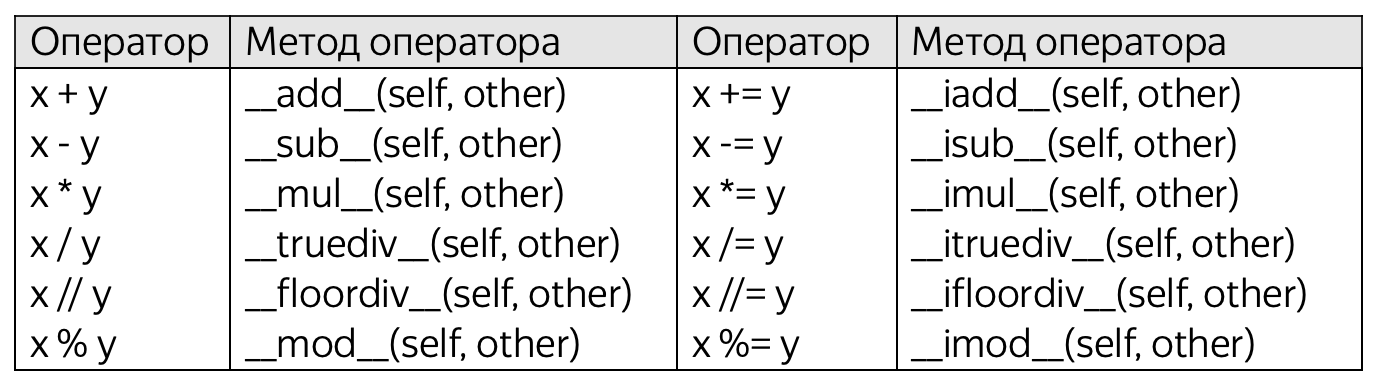

Предлагаю вам в качестве самостоятельного задания добавить некоторые из них в класс Clock по аналогии с методами __add__(). При этом обращайте внимание на недопустимость дублирования кода. Оно произойдет, если вы «в лоб» будете прописывать другие арифметические магические методы. Подумайте, как все сделать правильно.

# 4) __eq__, __ne__, __lt__, __gt__ and others

Далее мы будем рассматривать магические методы для реализации операторов сравнения:

* __eq__() – для равенства ==
* __ne__() – для неравенства !=
* __lt__() – для оператора меньше <
* __le__() – для оператора меньше или равно <=
* __gt__() – для оператора больше >
* __ge__() – для оператора больше или равно >=

Рассматривать работу этих методов мы будем на примере нашего класса Clock, который использовали ранее:

In [51]:
class Clock:
    __DAY = 86400   # число секунд в одном дне
 
    def __init__(self, seconds: int):
        if not isinstance(seconds, int):
            raise TypeError("Секунды должны быть целым числом")
        self.seconds = seconds % self.__DAY
 
    def get_time(self):
        s = self.seconds % 60            # секунды
        m = (self.seconds // 60) % 60    # минуты
        h = (self.seconds // 3600) % 24  # часы
        return f"{self.__get_formatted(h)}:{self.__get_formatted(m)}:{self.__get_formatted(s)}"
 
    @classmethod
    def __get_formatted(cls, x):
        return str(x).rjust(2, "0")

Изначально для класса реализован только один метод сравнения на равенство, например:

In [52]:
c1 = Clock(1000)
c2 = Clock(1000)
print(c1 == c2)

False


Но здесь объекты сравниваются по их id (адресу в памяти), а мы бы хотели, чтобы сравнивались секунды в каждом из объектов c1 и c2. Для этого переопределим магический метод __eq__(), следующим образом:
```
def __eq__(self, other):
        if not isinstance(other, (int, Clock)):
            raise TypeError("Операнд справа должен иметь тип int или Clock")
 
        sc = other if isinstance(other, int) else other.seconds
        return self.seconds == sc
```

In [53]:
class Clock:
    __DAY = 86400   # число секунд в одном дне
 
    def __init__(self, seconds: int):
        if not isinstance(seconds, int):
            raise TypeError("Секунды должны быть целым числом")
        self.seconds = seconds % self.__DAY
 
    def get_time(self):
        s = self.seconds % 60            # секунды
        m = (self.seconds // 60) % 60    # минуты
        h = (self.seconds // 3600) % 24  # часы
        return f"{self.__get_formatted(h)}:{self.__get_formatted(m)}:{self.__get_formatted(s)}"
 
    @classmethod
    def __get_formatted(cls, x):
        return str(x).rjust(2, "0")
    
    def __eq__(self, other):
        if not isinstance(other, (int, Clock)):
            raise TypeError("Операнд справа должен иметь тип int или Clock")
 
        sc = other if isinstance(other, int) else other.seconds
        return self.seconds == sc

In [54]:
c1 = Clock(1000)
c2 = Clock(1000)
print(c1 == c2)

True


Теперь, после запуска программы видим значение True, т.к. объекты содержат одинаковое время. Кроме того, мы можем совершенно спокойно выполнять проверку и на неравенство:

In [55]:
print(c1 != c2)

False


Смотрите, если интерпретатор языка Python не находит определение метода !=, то он пытается выполнить противоположное сравнение с последующей инверсией результата. То есть, в данном случае находится оператор == и выполняется инверсия:

not (a == b)

Давайте в этом убедимся, поставим точку останова в метод __eq__ и запустим программу. Как видите, он срабатывает и результат в последствии меняется на противоположный.

Отлично, на равенство и неравенство мы теперь можем сравнивать объекты класса Clock, а также с целыми числами. Однако, сравнение на больше или меньше пока не работает. Строчка программы:

In [56]:
print(c1 < c2)

TypeError: '<' not supported between instances of 'Clock' and 'Clock'

приведет к ошибке. Добавим эту операцию сравнения:
```
def __lt__(self, other):
        if not isinstance(other, (int, Clock)):
            raise TypeError("Операнд справа должен иметь тип int или Clock")
 
        sc = other if isinstance(other, int) else other.seconds
        return self.seconds < sc
```

In [ ]:
class Clock:
    __DAY = 86400   # число секунд в одном дне
 
    def __init__(self, seconds: int):
        if not isinstance(seconds, int):
            raise TypeError("Секунды должны быть целым числом")
        self.seconds = seconds % self.__DAY
 
    def get_time(self):
        s = self.seconds % 60            # секунды
        m = (self.seconds // 60) % 60    # минуты
        h = (self.seconds // 3600) % 24  # часы
        return f"{self.__get_formatted(h)}:{self.__get_formatted(m)}:{self.__get_formatted(s)}"
 
    @classmethod
    def __get_formatted(cls, x):
        return str(x).rjust(2, "0")
    
    def __eq__(self, other):
        if not isinstance(other, (int, Clock)):
            raise TypeError("Операнд справа должен иметь тип int или Clock")
 
        sc = other if isinstance(other, int) else other.seconds
        return self.seconds == sc
    
    def __lt__(self, other):
        if not isinstance(other, (int, Clock)):
            raise TypeError("Операнд справа должен иметь тип int или Clock")
 
        sc = other if isinstance(other, int) else other.seconds
        return self.seconds < sc

Как видите, у нас здесь получается дублирование кода. DRY. Поэтому, я вынесу общее для методов сравнения в отдельный метода класса:
```
@classmethod
def __verify_data(cls, other):
    if not isinstance(other, (int, Clock)):
        raise TypeError("Операнд справа должен иметь тип int или Clock")

    return other if isinstance(other, int) else other.seconds
```

А сами методы примут вид:
```
def __eq__(self, other):
        sc = self.__verify_data(other)
        return self.seconds == sc
 
def __lt__(self, other):
    sc = self.__verify_data(other)
    return self.seconds < sc

```

In [57]:
class Clock:
    __DAY = 86400   # число секунд в одном дне
 
    def __init__(self, seconds: int):
        if not isinstance(seconds, int):
            raise TypeError("Секунды должны быть целым числом")
        self.seconds = seconds % self.__DAY
 
    def get_time(self):
        s = self.seconds % 60            # секунды
        m = (self.seconds // 60) % 60    # минуты
        h = (self.seconds // 3600) % 24  # часы
        return f"{self.__get_formatted(h)}:{self.__get_formatted(m)}:{self.__get_formatted(s)}"
 
    @classmethod
    def __verify_data(cls, other):
        if not isinstance(other, (int, Clock)):
            raise TypeError("Операнд справа должен иметь тип int или Clock")
 
        return other if isinstance(other, int) else other.seconds
    
    def __eq__(self, other):
        sc = self.__verify_data(other)
        return self.seconds == sc
 
    def __lt__(self, other):
        sc = self.__verify_data(other)
        return self.seconds < sc

Итак, мы определили сравнение на равенство и меньше. Теперь, можно сравнивать объекты класса Clock на эти операции и дополнительно на неравенство и больше. Сейчас команда:

In [58]:
c1 = Clock(1000)
c2 = Clock(2000)
print(c1 < c2)

True


Выдаст True, так как первое время меньше второго. И также мы можем совершенно спокойно делать проверку на больше:

In [59]:
print(c1 > c2)

False


Здесь сработает тот же метод меньше, но для объекта c2:

c2 < c1

То есть, в отличие от оператора ==, где применяется инверсия, здесь меняется порядок операндов. Разумеется, если в классе определен метод больше:
```
def __gt__(self, other):
        sc = self.__verify_data(other)
        return self.seconds > sc
```

In [60]:
class Clock:
    __DAY = 86400   # число секунд в одном дне
 
    def __init__(self, seconds: int):
        if not isinstance(seconds, int):
            raise TypeError("Секунды должны быть целым числом")
        self.seconds = seconds % self.__DAY
 
    def get_time(self):
        s = self.seconds % 60            # секунды
        m = (self.seconds // 60) % 60    # минуты
        h = (self.seconds // 3600) % 24  # часы
        return f"{self.__get_formatted(h)}:{self.__get_formatted(m)}:{self.__get_formatted(s)}"
 
    @classmethod
    def __verify_data(cls, other):
        if not isinstance(other, (int, Clock)):
            raise TypeError("Операнд справа должен иметь тип int или Clock")
 
        return other if isinstance(other, int) else other.seconds
    
    def __eq__(self, other):
        sc = self.__verify_data(other)
        return self.seconds == sc
 
    def __lt__(self, other):
        sc = self.__verify_data(other)
        return self.seconds < sc
    
    def __gt__(self, other):
        sc = self.__verify_data(other)
        return self.seconds > sc

то он будет найден и выполнен. Подмена происходит только в случае отсутствия соответствующего магического метода.

И то же самое для методов сравнения на меньше или равно и больше или равно:

```
def __le__(self, other):
        sc = self.__verify_data(other)
        return self.seconds <= sc
```

In [62]:
class Clock:
    __DAY = 86400   # число секунд в одном дне
 
    def __init__(self, seconds: int):
        if not isinstance(seconds, int):
            raise TypeError("Секунды должны быть целым числом")
        self.seconds = seconds % self.__DAY
 
    def get_time(self):
        s = self.seconds % 60            # секунды
        m = (self.seconds // 60) % 60    # минуты
        h = (self.seconds // 3600) % 24  # часы
        return f"{self.__get_formatted(h)}:{self.__get_formatted(m)}:{self.__get_formatted(s)}"
 
    @classmethod
    def __verify_data(cls, other):
        if not isinstance(other, (int, Clock)):
            raise TypeError("Операнд справа должен иметь тип int или Clock")
 
        return other if isinstance(other, int) else other.seconds
    
    def __eq__(self, other):
        sc = self.__verify_data(other)
        return self.seconds == sc
 
    def __lt__(self, other):
        sc = self.__verify_data(other)
        return self.seconds < sc
    
    def __gt__(self, other):
        sc = self.__verify_data(other)
        return self.seconds > sc
    
    def __le__(self, other):
        sc = self.__verify_data(other)
        return self.seconds <= sc

Если мы его вызовем непосредственно для объектов класса:

In [64]:
c1 = Clock(1000)
c2 = Clock(2000)
print(c1 <= c2)

True


то он сработает и результат отобразится в консоли. Но, если пропишем обратное сравнение:

In [65]:
print(c1 >= c2)

False


то просто изменится порядок операндов и будет взято все то же сравнение меньше или равно.

То есть, для определения операций сравнения достаточно в классе определить только три метода: ==, <, <=, если остальные являются их симметричной противоположностью. В этом случае язык Python сам подберет нужный метод и выполнит его при сравнении объектов.

# 5) __eq__ and __hash__

Затронем тему вычисления хеша для объектов классов. Вначале что это такое и зачем нужно? В Python имеется специальная функция:

In [67]:
print(hash(123))
print(hash("Python"))
hash((1, 2, 3))

123
4626920187239456081


529344067295497451

которая формирует по определенному алгоритму целочисленные значения для неизменяемых объектов. Причем, для равных объектов на выходе всегда должны получаться равные хэши.
Хэш-функция выполняет хэширование, превращая любые данные в последовательность байтов фиксированного размера, называемую хэш-значением или хэш-кодом.

Отступление:
Когда вы вызываете hash() с тем же аргументом в рамках существующей сессии интерпретатора, вы получите тот же результат. Это потому, что хэш-значения неизменяемы и не меняются в течение всего времени жизни объекта. Однако, как только вы выйдете из Python и запустите его снова, вы почти наверняка увидите разные хэш-значения во всех вызовах Python.
Это ожидаемое поведение, которое было реализовано в Python в качестве контрмеры против атаки Denial-of-Service (DoS), которая использовала известную уязвимость хэш-функций в веб-серверах. Злоумышленники могли использовать слабый хэш-алгоритм для преднамеренного создания так называемых хэш-коллизий, перегружая сервер и делая его недоступным. Типичным мотивом атаки был выкуп, поскольку большинство жертв зарабатывали деньги за счет бесперебойного присутствия в Интернете.

Сегодня Python по умолчанию позволяет рандомизировать хэш для некоторых входных данных, таких как строки, чтобы сделать хэш-значения менее предсказуемыми. Это делает функцию hash() немного более безопасной, а атаку - более сложной. Однако рандомизацию можно отключить, задав фиксированное значение seed, например, через переменную окружения PYTHONHASHSEED

А вот обратное утверждение делать нельзя: равные хэши не гарантируют равенство объектов. Это, как в известном выражении: селедка – это рыба, но не каждая рыба селедка. С хэшами все то же самое.

Однако, если хеши не равны, то и объекты точно не равны. Получаем следующие свойства для хеша:

1) Если объекты a == b (равны), то равен и их хэш.
2) Если равны хеши: hash(a) == hash(b), то объекты могут быть равны, но могут быть и не равны. Хотя хорошо продуманные хэш-функции будут максимально избегать этого. 
3) Если хеши не равны: hash(a) != hash(b), то объекты точно не равны.

Причем, обратите внимание, хэши можно вычислять только для неизменяемых объектов. Например, для списков:

In [68]:
hash([1, 2, 3])

TypeError: unhashable type: 'list'

получим ошибку «unhashable type» - не хэшируемый объект.

Итак, мы увидели, что для любого неизменяемого объекта можно вычислять хэш с помощью функции hash(), но зачем все это надо? В действительности некоторые объекты в Python, например, словари используют хэши в качестве своих ключей. Вспомним, когда мы у словаря указываем ключ, то он должен относиться к неизменяемому типу данных:

In [70]:
d = {}
d[5] = 5
d["python"] = "python"
d[(1, 2, 3)] = [1, 2, 3]
d

{5: 5, 'python': 'python', (1, 2, 3): [1, 2, 3]}

d[[1,2]] Список в качестве ключа не можем использовать

В действительности, это необходимо, чтобы можно было вычислить хеш объектов и ключи хранить в виде:

(хэш ключа, ключ)

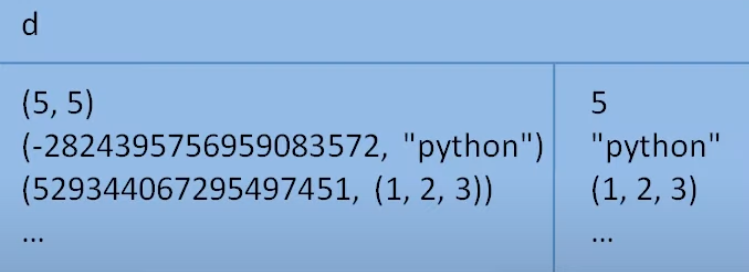

Для чего это понадобилось? Дело в том, что первоначально нужная запись в словаре ищется по хэшу, так как существует быстрый алгоритм поиска нужного значения хэша. А, затем, для равных хешей (если такие были обнаружены), отбирается запись с указанным в ключе объекте. Такой подход значительно ускоряет поиск значения в словаре.

Думаю, теперь вы представляете себе, что такое хэш и зачем он нужен. Давайте теперь рассмотрим простой класс Point для представления точки на плоскости:

In [71]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

Для экземпляров этого класса:

In [72]:
p1 = Point(1, 2)
p2 = Point(1, 2)

мы совершенно спокойно можем вычислять хеш для наших объектов:

In [73]:
print(hash(p1), hash(p2), sep='\n')

277674417
277674705


Обратите внимание, несмотря на то, что координаты точек p1 и p2 равны, их хэши разные. То есть, с точки зрения функции hash() – это два разных объекта и интерпретатор воспринимает эти объекты как неизменяемые. Объекты пользовательского класса воспринимаются как неизменяемые. Но как она понимает, равные объекты или разные? Все просто. Если оператор сравнения:

In [74]:
print(p1 == p2)

False


дает True, то объекты равны, False – не равны. Соответственно, для разных объектов будут получаться и разные хэши. Для одинаковых - одинаковый. Но раз это так, что будет, если мы переопределим в классе Point поведение этого оператора сравнения с помощью магического метода __eq__(), который отвечает за работу оператора сравнения? Давайте переопределим его. По умолчанию наслеюуется от object. И сделаем так, что объекты, у которых одинаковые координаты x и y были бы равны:
```
def __eq__(self, other):
        return self.x == other.x and self.y == other.y 
```

In [150]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y

In [152]:
p1 = Point(1, 2)
p2 = Point(1, 2)
print(p1 == p2)

True


In [153]:
print(hash(p1), hash(p2), sep='\n')

TypeError: unhashable type: 'Point'

Теперь у нас объекты с одинаковыми координатами будут считаться равными. Но при запуске программы возникает ошибка «unhashable type», то есть, наши объекты стали не хэшируемыми. Да, как только происходит переопределение оператора ==, то стандартный алгоритм вычисления хэша для таких объектов перестает работать. Как можно все-таки вычислять хэш для объектов, где мы переопределили магический метод eq.  Для этого, нам здесь нужно прописать свой способ вычисления хэша объектов через магический метод __hash__(), например, так:
```
def __hash__(self):
        return hash((self.x, self.y))
```
Который вызывается, когда вычисляется хэш нашего объекта.

In [154]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    
    def __hash__(self):
        return hash((self.x, self.y)) # Вызываем стандартную функцию hash от кортежа 

In [155]:
p1 = Point(1, 2)
p2 = Point(1, 2)
print(hash(p1), hash(p2), sep='\n')

-3550055125485641917
-3550055125485641917


Мы здесь вызываем функцию hash для кортежа из координат точки. Этот кортеж относится к неизменяемому типу, поэтому для него можно применить стандартную функцию hash(). То есть, мы подменили вычисление хэша объекта класса Point на вычисление хэша от координат точки. Теперь, после запуска программы видим, что объекты равны и их хэши также равны.

Что это в итоге означает? Смотрите, если взять пустой словарь:

In [156]:
d = {}

А, затем, сформировать записи через объекты p1 и p2:

In [157]:
d[p1] = 1 # Ключу p1 присваиваем значение 1
d[p2] = 2
print(d)

{<__main__.Point object at 0x104554290>: 2}


то они будут восприниматься как один и тот же ключ, так как объекты равны и их хэши тоже равны. И оператор сравнения на равенство этих объектов также выдает true. А вот если магические методы в классе Point поставить в комментарии и снова запустить программу, то увидим, что это уже разные объекты, которые формируют разные ключи словаря. Вот для чего может понадобиться тонко настраивать работу функции hash() для объектов классов. И теперь вы знаете, как это делается.

In [158]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

p1 = Point(1, 2)
p2 = Point(1, 2)
print(hash(p1), hash(p2), sep='\n')
d = {}
d[p1] = 1 # Ключу p1 присваиваем значение 1
d[p2] = 2
print(d)

272978545
272978049
{<__main__.Point object at 0x104552710>: 1, <__main__.Point object at 0x104550810>: 2}


Если мы хотим, чтобы точки, с одинаковыми координатами воспринимались, как один объект, то можно переопределить метод hash

immutable - неизменяемые

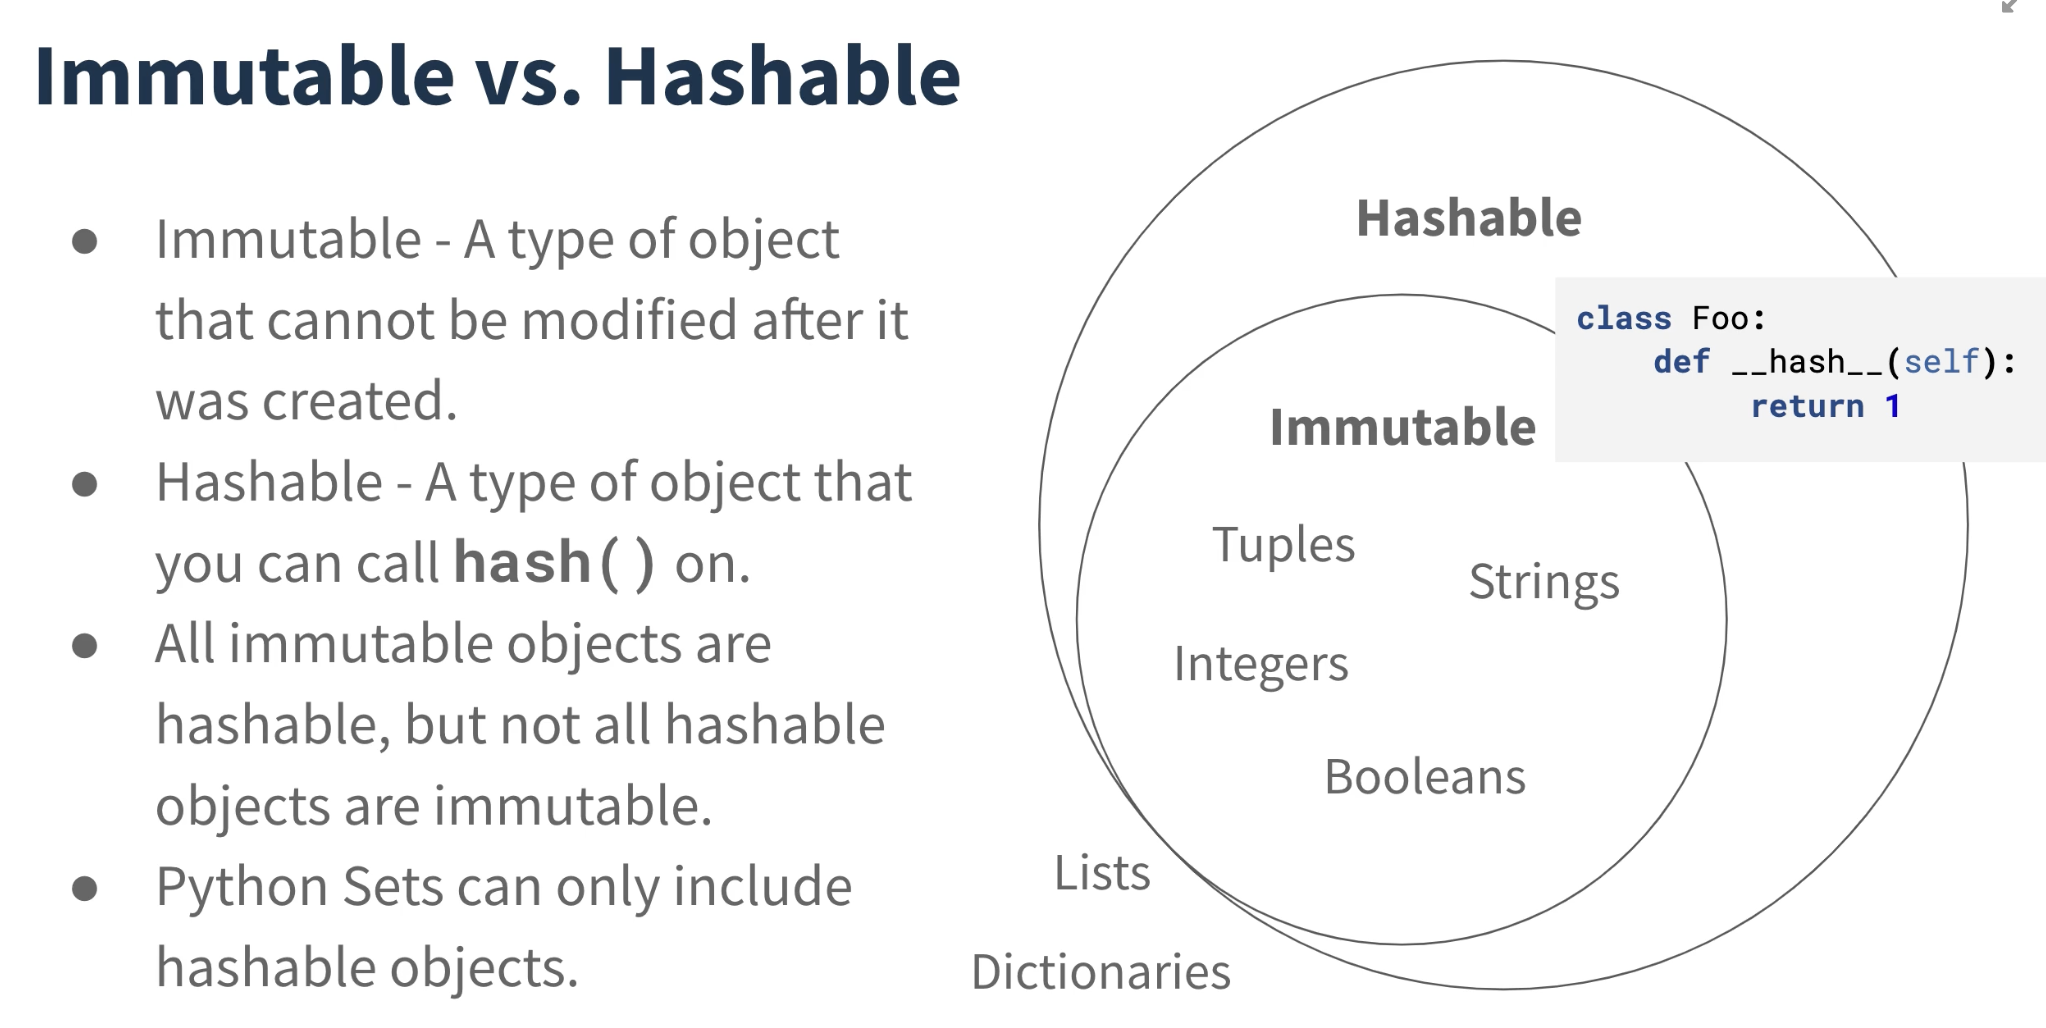

# 6) __bool__

Мы поговорим о способах настройки и определения правдивости объектов классов. Что такое правдивость? Это когда к экземпляру явно или неявно применяется функция bool(). С ней мы с вами уже знакомы и применяли к обычным типам данных:

In [87]:
print(bool(123))
print(bool(-1))
print(bool(0))
print(bool("python"))
print(bool(""))
print(bool([]))

True
True
False
True
False
False


В стандартном поведении она возвращает True для непустых объектов и False – для пустых. Давайте посмотрим, что она будет выдавать для экземпляров классов. Я возьму класс из предыдущего занятия:

In [88]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

Создадим его объект:

In [89]:
p = Point(3, 4)

и применим к нему функцию bool():

In [90]:
print(bool(p))

True


Увидим значение True. В действительности, эта функция всегда возвращает True для любых объектов пользовательского класса. Получается, что смысла в ней особого нет, применительно к экземплярам наших классов? Не совсем. Мы можем переопределить ее поведение либо через магический метод __len__(), либо через метод __bool__():

* __len__() – вызывается функцией bool(), если не определен магический метод __bool__();
* __bool__() – вызывается в приоритетном порядке функцией bool().

Вначале я пропишу магический метод __len__() в классе Point, следующим образом:

In [91]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
 
    def __len__(self):
        print("__len__")
        return self.x * self.x + self.y * self.y

В этом методе я вычисляю и возвращаю квадрат длины радиус-вектора с координатами (x; y). Запустим программу и видим значение True, а также сообщение «__len__». То есть, действительно был вызван метод __len__() и, так как он вернул не нулевое значение, то функция bool() интерпретировала его как True.

Давайте в экземпляре класса пропишем нулевые координаты, чтобы длина вектора была нулевой:

In [93]:
p = Point(0, 0)
print(bool(p))

__len__
False


Теперь видим ожидаемое значение False.

Конечно, если нам нужно явно описать алгоритм работы функции bool() применительно к нашим экземплярам класса, то следует использовать магический метод __bool__(). Я запишу его в таком виде:
```
def __bool__(self):
        print("__bool__")
        return self.x == self.y
```

In [95]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
 
    def __len__(self):
        print("__len__")
        return self.x * self.x + self.y * self.y
    
    def __bool__(self):
        print("__bool__")
        return self.x == self.y

Теперь, объект будет считаться правдивым (истинным), если его координаты равны. Запускаем программу и видим, что для нулей отображается значение True. Если же прописать не равные координаты:

In [96]:
p = Point(10, 20)
print(bool(p))

__bool__
False


то получаем значение False. Конечно, такая реализация магического метода __bool__() – это лишь учебный пример, чтобы вы поняли принцип его работы. В реальности, мы можем в этом методе прописывать любую логику. Единственное условие, чтобы данный метод возвращал булево значение True или False. Указывать в операторе return другие типы данных запрещено.

Все это хорошо, но где это используется? Чаще всего в условных конструкциях. Например, если прописать вот такое условие:

In [97]:
if p:
    print("объект p дает True")
else:
    print("объект p дает False")

__bool__
объект p дает False


Здесь происходит неявный вызов функции bool() при проверке условия. Поэтому в программах, где требуется описать собственные проверки истинности или ложности объектов, то пользуются или магическим методом __len__(), но чаще всего, магическим методом __bool__().

# 7) __getitem__, __setitem__ and __delitem__

Рассмотрим следующие методы:

* __getitem__(self, item) – получение значения по ключу item;
* __setitem__(self, key, value) – запись значения value по ключу key;
* __delitem__(self, key) – удаление элемента по ключу key.

Давайте разберемся для чего они нужны и как их можно использовать. Предположим, что мы создаем класс для представления студентов:

In [98]:
class Student:
    def __init__(self, name, marks):
        self.name = name
        self.marks = list(marks)

Его экземпляр можно сформировать, следующим образом:

In [99]:
s1 = Student('Сергей', [5, 5, 3, 2, 5])
s1.__dict__

{'name': 'Сергей', 'marks': [5, 5, 3, 2, 5]}

В объекте s1 имеется локальное свойство marks со списком студентов. Мы можем к нему обратиться и выбрать любую оценку:

In [100]:
print(s1.marks[2])

3


Но что если мы хотим делать то же самое, но используя только ссылку на объект s1:
```
print(s1[2])
```

In [101]:
print(s1[2])

TypeError: 'Student' object is not subscriptable

Если сейчас запустить программу, то увидим сообщение об ошибке, что наш класс (объект) не поддерживает такой синтаксис. Как вы, наверное, уже догадались, поправить это можно с помощью магического метода __getitem__. Запишем его в нашем классе, следующим образом:
```
def __getitem__(self, item):
        return self.marks[item]
```

In [104]:
class Student:
    def __init__(self, name, marks):
        self.name = name
        self.marks = list(marks)

    def __getitem__(self, item):
        return self.marks[item]

In [106]:
s1 = Student('Сергей', [5, 5, 3, 2, 5])
print(s1[2])

3


Теперь ошибок нет и на экране видим значение 3. Однако, если указать неверный индекс:
```
print(s1[20])
```

In [107]:
print(s1[20])

IndexError: list index out of range

то получим исключение IndexError, которое сгенерировал список marks. При необходимости, мы можем сами контролировать эту ошибку, если в методе __getitem__ пропишем проверку:
```
def __getitem__(self, item):
        if 0 <= item < len(self.marks):
            return self.marks[item]
        else:
            raise IndexError("Неверный индекс")
```

In [108]:
class Student:
    def __init__(self, name, marks):
        self.name = name
        self.marks = list(marks)

    def __getitem__(self, item):
        if 0 <= item < len(self.marks):
            return self.marks[item]
        else:
            raise IndexError("Неверный индекс")

In [109]:
s1 = Student('Сергей', [5, 5, 3, 2, 5])
print(s1[20])

IndexError: Неверный индекс

При запуске программы видим наше сообщение «Неверный индекс». Также можно сделать проверку на тип индекса:
```
print(s1['abc'])
```

для списков он должен быть целым числом. Поэтому дополнительно можно записать такую проверку:
```
def __getitem__(self, item):
        if not isinstance(item, int):
            raise TypeError("Индекс должен быть целым числом")
 
       if 0 <= item < len(self.marks):
            return self.marks[item]
        else:
            raise IndexError("Неверный индекс")
```

In [112]:
class Student:
    def __init__(self, name, marks):
        self.name = name
        self.marks = list(marks)

    def __getitem__(self, item):
        if not isinstance(item, int):
            raise TypeError("Индекс должен быть целым числом")
 
        if 0 <= item < len(self.marks):
            return self.marks[item]
        else:
            raise IndexError("Неверный индекс")

То есть, здесь возможны самые разные вариации обработки и проверки исходных данных, прежде чем обратиться к списку marks и вернуть значение.

Теперь давайте предположим, что хотели бы иметь возможность менять оценки студентов, используя синтаксис:
```
s1[2] = 4
print(s1[2])
```

In [113]:
s1 = Student('Сергей', [5, 5, 3, 2, 5])
s1[2] = 4

TypeError: 'Student' object does not support item assignment

Сейчас, после запуска программы будет ошибка TypeError, что объект не поддерживает операцию присвоения, так как в классе не реализован метод __setitem__. Давайте добавим и его:
```
def __setitem__(self, key, value):
        if not isinstance(key, int) or key < 0:
            raise TypeError("Индекс должен быть целым неотрицательным числом")
 
        self.marks[key] = value
```

In [114]:
class Student:
    def __init__(self, name, marks):
        self.name = name
        self.marks = list(marks)

    def __getitem__(self, item):
        if not isinstance(item, int):
            raise TypeError("Индекс должен быть целым числом")
 
        if 0 <= item < len(self.marks):
            return self.marks[item]
        else:
            raise IndexError("Неверный индекс")
        
    def __setitem__(self, key, value):
        if not isinstance(key, int) or key < 0:
            raise TypeError("Индекс должен быть целым неотрицательным числом")
 
        self.marks[key] = value

Однако, если мы сейчас укажем несуществующий индекс:

In [115]:
s1 = Student('Сергей', [5, 5, 3, 2, 5])
s1[6] = 4

IndexError: list assignment index out of range

то операция присвоения новой оценки приведет к ошибке. Если предполагается использовать такую возможность, то реализовать ее можно, следующим образом:
```
def __setitem__(self, key, value):
        if not isinstance(key, int) or key < 0:
            raise TypeError("Индекс должен быть целым неотрицательным числом")
 
        if key >= len(self.marks):
            off = key + 1 - en(self.marks)
            self.marks.extend([None]*off)
 
        self.marks[key] = value
```

In [120]:
class Student:
    def __init__(self, name, marks):
        self.name = name
        self.marks = list(marks)

    def __getitem__(self, item):
        if not isinstance(item, int):
            raise TypeError("Индекс должен быть целым числом")
 
        if 0 <= item < len(self.marks):
            return self.marks[item]
        else:
            raise IndexError("Неверный индекс")
        
    def __setitem__(self, key, value):
        if not isinstance(key, int) or key < 0:
            raise TypeError("Индекс должен быть целым неотрицательным числом")
 
        if key >= len(self.marks):
            off = key + 1 - len(self.marks)
            self.marks.extend([None]*off)
 
        self.marks[key] = value

Если индекс превышает размер списка, то мы расширяем список значениями None до нужной длины (с помощью метода extend), а затем, в последний элемент записываем переданное значение value. Теперь, при выполнении команд:

In [121]:
s1 = Student('Сергей', [5, 5, 3, 2, 5])
s1[10] = 4
print(s1.marks)

[5, 5, 3, 2, 5, None, None, None, None, None, 4]


Увидим список:

[5, 5, 3, 2, 5, None, None, None, None, None, 4]

То есть, он был расширен до 10 элементов и последним элементом записано 4. И так можно прописывать любую нужную нам логику при записи новых значений в список marks.

Наконец, последний третий магический метод __delitem__ вызывается при удалении элемента из списка. Если сейчас записать команду:

In [122]:
del s1[2]

AttributeError: __delitem__

то в консоли увидим сообщение: «AttributeError: __delitem__». Здесь явно указывается, что при удалении вызывается метод __delitem__. Добавим его в наш класс:
```
def __delitem__(self, key):
        if not isinstance(key, int):
            raise TypeError("Индекс должен быть целым числом")
 
        del self.marks[key]
```

In [123]:
class Student:
    def __init__(self, name, marks):
        self.name = name
        self.marks = list(marks)

    def __getitem__(self, item):
        if not isinstance(item, int):
            raise TypeError("Индекс должен быть целым числом")
 
        if 0 <= item < len(self.marks):
            return self.marks[item]
        else:
            raise IndexError("Неверный индекс")
        
    def __setitem__(self, key, value):
        if not isinstance(key, int) or key < 0:
            raise TypeError("Индекс должен быть целым неотрицательным числом")
 
        if key >= len(self.marks):
            off = key + 1 - len(self.marks)
            self.marks.extend([None]*off)
 
        self.marks[key] = value

    def __delitem__(self, key):
        if not isinstance(key, int):
            raise TypeError("Индекс должен быть целым числом")
 
        del self.marks[key]

In [125]:
s1 = Student('Сергей', [5, 5, 3, 2, 5])
print(s1.marks)
del s1[2]
print(s1.marks)

[5, 5, 3, 2, 5]
[5, 5, 2, 5]


Теперь оценки успешно удаляются, если указан верный индекс.

In [126]:
del s1[12]

IndexError: list assignment index out of range

# 8) __iter__ and __next__

Рассмотрим методы:

* __iter__(self) – получение итератора для перебора объекта;
* __next__(self) – переход к следующему значению и его считывание.

Давайте разберемся для чего они нужны и как их можно использовать. Вы все знаете, как работает функция range(). Она выдает значения арифметической прогрессии, например:

In [127]:
list(range(5))

[0, 1, 2, 3, 4]

дает последовательность целых чисел от 0 до 4. Перебрать значения объекта range также можно через итератор:

In [129]:
a = iter(range(5))
next(a)
next(a)
# ...

1

В конце генерируется исключение StopIteration. Так вот, мы можем создать подобный объект, используя магические методы __iter__ и __next__. Давайте это сделаем для объекта frange, который будет выдавать последовательность вещественных чисел арифметической прогрессии. Для этого я объявлю класс:

In [ ]:
class FRange:
    def __init__(self, start=0.0, stop=0.0, step=1.0):
        self.start = start
        self.stop = stop
        self.step = step
        self.value = self.start - self.step

Здесь в инициализатор мы передаем начальное значение прогрессии, конечное и шаг изменения. Также формируем свойство value, которое будет представлять собой текущее значение для считывания.

Для перебора элементов добавим в этот класс магический метод __next__:

In [130]:
class FRange:
    def __init__(self, start=0.0, stop=0.0, step=1.0):
        self.start = start
        self.stop = stop
        self.step = step
        self.value = self.start - self.step

    def __next__(self):
        if self.value + self.step < self.stop:
            self.value += self.step
            return self.value
        else:
            raise StopIteration

В этом методе мы увеличиваем значение value на шаг step и возвращаем до тех пор, пока не достигли значения stop (не включая его). При достижении конца генерируем исключение StopIteration, ровно так, как это делает объект range.

Сформируем объект этого класса:

In [131]:
fr = FRange(0, 2, 0.5)

и четыре раза вызовем метод __next__()

In [132]:
print(fr.__next__())
print(fr.__next__())
print(fr.__next__())
print(fr.__next__())

0.0
0.5
1.0
1.5


Видим четыре значения нашей арифметической прогрессии. Если вызвать __next__() еще раз:

In [133]:
print(fr.__next__())

StopIteration: 

получим исключение StopIteration. В целом получился неплохой учебный пример. В действительности, благодаря определению магического метода __next__ в классе FRange, мы можем применять функцию next() для перебора значений его объектов:

In [134]:
fr = FRange(0, 2, 0.5)
print(next(fr))
print(next(fr))
print(next(fr))
print(next(fr))

0.0
0.5
1.0
1.5


Здесь функция next(), в своей реализации вызывает метод __next__ и возвращенное им значение, возвращается функцией next(). При этом, в качестве аргумента мы ей передаем экземпляр самого класса. То есть, объект класса выступает в роли итератора. В нашем случае так и задумывалось. Однако, перебрать объект fr с помощью цикла for не получится:

In [135]:
for x in fr:
    print(x)

TypeError: 'FRange' object is not iterable

Появится ошибка, что объект не итерируемый. Почему? Ведь мы прописали поведение функции next()? Этого не достаточно. Необходимо еще, чтобы объект возвращал итератор при вызове функции iter:

In [136]:
it = iter(fr)

TypeError: 'FRange' object is not iterable

Для этого в классе нужно прописать еще один магический метод __iter__. В нашем примере он будет выглядеть, так:
```
def __iter__(self):
        self.value = self.start - self.step
        return self
```

In [140]:
class FRange:
    def __init__(self, start=0.0, stop=0.0, step=1.0):
        self.start = start
        self.stop = stop
        self.step = step
        self.value = self.start - self.step

    def __iter__(self):
        self.value = self.start - self.step
        return self

    def __next__(self):
        if self.value + self.step < self.stop:
            self.value += self.step
            return self.value
        else:
            raise StopIteration

Мы здесь устанавливаем начальное значение value и возвращаем ссылку на объекта класса, так как этот объект в нашем примере и есть итератор – через него вызывается магический метод __next__.

Теперь, после запуска программы у нас не возникает никаких ошибок и цикл for перебирает значения объекта fr. 

In [141]:
fr = FRange(0, 2, 0.5)
for x in fr:
    print(x)

0.0
0.5
1.0
1.5


То же самое мы можем сделать и через next():

In [142]:
fr = FRange(0, 2, 0.5)
it = iter(fr)
print(next(it))
print(next(it))
print(next(it))
print(next(it))

0.0
0.5
1.0
1.5


Как вы помните, цикл for именно так и перебирает итерируемые объекты, сначала неявно вызывает функцию iter(), а затем, на каждой итерации – функцию next(), пока не возникнет исключение StopIteration. Кроме того, благодаря магическому методу __iter__ мы теперь можем обходить значения объекта fr много раз с самого начала, например:

In [144]:
it = iter(fr)
print(next(it))
print(next(it))
print(next(it))
print(next(it))

print("===")
 
it = iter(fr)
print(next(it))
print(next(it))
print(next(it))
print(next(it))

0.0
0.5
1.0
1.5
===
0.0
0.5
1.0
1.5


Таким образом, сформировали класс FRange, который воспринимается как итерируемый объект с возможностью перебора функцией next() или циклом for.